In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [10, 5]


In [106]:
user_levels_df = pd.read_csv('Data/user_levels.csv')
user_levels_df.sort_values(by = 'author', ascending = True).head(20)

,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2
1855,1855,--fr0stbit3--,N:🇺🇸 A2:🇪🇸,['en'],[],['es'],[],[],[],[]
1118,1118,-TNB-o-,🇺🇸 -> 🇯🇵,[],[],[],[],[],[],[]
1319,1319,-Vampires-,EN | ES | CN,[],[],[],[],[],[],[]
813,813,-tobyt,N 🇬🇧 | B2 🇪🇸 | B1 🇫🇷,['en'],[],[],['fr'],['es'],[],[]
1485,1485,-wojteq-,🇵🇱 N | 🇬🇧 B2 | 🇷🇺 A1,['pl'],['ru'],[],[],['en'],[],[]
1139,1139,069988244,N🇬🇧 | 🇫🇷,['en'],[],[],[],[],[],[]
900,900,0mnicious,🇬🇧 🇵🇹 N | 🇮🇹 B1 🇯🇵 A2,[],[],[],[],[],[],[]
918,918,1001010010012,🇪🇦 N 🇺🇸 C1 🇲🇫 B2,['es'],[],[],[],['fr'],['en'],[]
1172,1172,1020randomperson,🇰🇷 | 🏴󠁧󠁢󠁥󠁮󠁧󠁿🇯🇵 | 🇫🇷 | 🇬🇪,[],[],[],[],[],[],[]
410,410,11abjurer,le epic flair,[],[],[],[],[],[],[]


We first want to keep only the native english speakers

In [107]:
print('The dataset contains ', user_levels_df['N'].str.contains('en|EN|En|eN').sum(), ' native english speakers.')

The dataset contains  825  native english speakers.


In [108]:
native_english_df = user_levels_df[user_levels_df['N'].str.contains('en|EN|En|eN')]
native_english_df.sort_values(by = 'author', ascending=True)

,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2
1855,1855,--fr0stbit3--,N:🇺🇸 A2:🇪🇸,['en'],[],['es'],[],[],[],[]
813,813,-tobyt,N 🇬🇧 | B2 🇪🇸 | B1 🇫🇷,['en'],[],[],['fr'],['es'],[],[]
1139,1139,069988244,N🇬🇧 | 🇫🇷,['en'],[],[],[],[],[],[]
462,462,1ast0ne,🇺🇸N | 🇩🇪B1 🇪🇸 B1 | trying out: 🇦🇪 🇭🇹 🇮🇪,['en'],[],[],"['de', 'es']",[],[],[]
649,649,2plash6,🇺🇸N🇷🇺Тrуing му беsт🇪🇸HS Only,['en'],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...
1993,1993,yxngfabio,🇺🇸 N | 🇪🇸 C1 | 🇧🇷 C1 | 🇷🇺 B1 | 🇨🇳 HSK1,['en'],[],[],['ru'],[],"['es', 'pt']",[]
1944,1944,zamo555,🇬🇧N | 🇫🇷🇰🇷A2,['en'],[],[],[],[],[],[]
595,595,zazzerida,En N | Fr B2; Es A2; It A2; De A2,['En'],[],"['Es', 'It', 'De']",[],['Fr'],[],[]
367,367,zealouspilgrim,Native: 🇨🇦 | Learning: ht,['en'],[],[],[],[],[],[]


Now, we load the comments from all the native english speakers authors to add a column "comments" and statistics about this comments in the main dataset. 

In [109]:
# Reduce the main dataframe to the column of interest  
native_english_df = native_english_df[['author', 'N']]

# path to my json files folder
path_to_json = 'Data/user_comments/'

# initialize empty array to construct the new columns in the for loop afterwards
body = []
average_number_of_words = []
number_of_comments = []
total_words = []

# Look through all the native english authors .json to extract the comments and their statistics : average number of words and number of comments per author 
for index, row in native_english_df.iterrows():
    df = pd.read_json(path_to_json + row['author'] + '.json')

    # Some author doesn't have any comments in their json files because they are suspended
    # We fill their values with NaNs
    if (df.iloc[0][0] == 'suspended'):
        print(row['author'], "is suspended.")
        body.append(np.NaN)
        average_number_of_words.append(np.NaN)
        total_words.append(np.NaN)
        number_of_comments.append(np.NaN)
    
    # For the other authors, all the comments are put in a list, 
    # we count the number of words in average and the number of comments
    else:
        body.append(df.body.to_list())
        average_number_of_words.append(df['body'].apply(lambda n: len(n.split())).mean())
        total_words.append(df['body'].apply(lambda n: len(n.split())).sum())
        number_of_comments.append(len(df.body))

# Add columns of comments, average number of words per comment and number of comments to the main dataframe
native_english_df['comments'] = body 
native_english_df['nb_comments'] = number_of_comments
native_english_df['average_nb_words'] = average_number_of_words
native_english_df['total_words'] = total_words

native_english_df.sort_values(by = 'total_words').head(10)  

MeNoThinkyBrain is suspended.
LiterallySoFamous is suspended.


,author,N,comments,nb_comments,average_nb_words,total_words
1541,marquisdecarabas17,['en'],[Go to a language school],1.0,5.000,5.0
1641,MushroomSalt16A,['EN'],"[Kazakh, I haven't had much luck finding anyth...",1.0,8.000,8.0
1471,Motor_Lion9251,['en'],"[No not at all. What’s your native language?, ...",5.0,3.200,16.0
790,felinelucki,['en'],[Bisexual but only liking one gender is called...,4.0,19.250,77.0
1196,TinDinoGamer,['en'],"[I remember this! 😃, That’s crazy! 😳, r/charge...",25.0,3.600,90.0
832,imlootkemia,['en'],[rolling stones is a bad omen. that guy better...,7.0,13.000,91.0
2143,Mysterious_Ratio8813,['en'],"[Arabic and French, Assuming personal statemen...",16.0,7.625,122.0
1304,ScarletS5,"['en', None]","[I just got my first 80k last week, at tier 54...",7.0,18.000,126.0
258,tieflingartificer,['en'],[This is why they’re doing it. Sims 5 may or m...,5.0,26.800,134.0
770,beanyboy3s,['en'],[Hola a tots. Si hi ha algu q parli català sis...,5.0,29.400,147.0


We will then explore the statistics of the different authors in order to eliminate the outliers, standardize, normalize, etc

In [110]:
native_english_df[['nb_comments', 'total_words']].describe()

,nb_comments,total_words
count,823.000000,823.000000
mean,617.393682,24892.465371
std,391.039516,25537.449418
min,1.000000,5.000000
25%,205.500000,6194.500000
50%,773.000000,18802.000000
75%,997.000000,35562.500000
max,1000.000000,318697.000000


<AxesSubplot: >

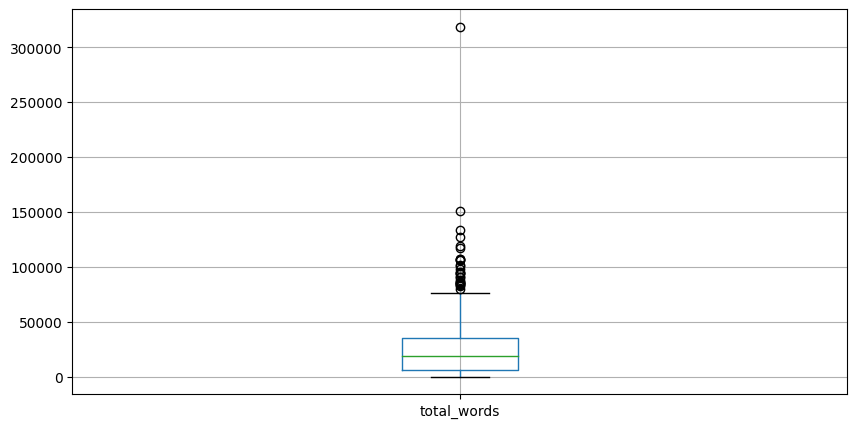

In [111]:
native_english_df[['total_words']].boxplot()

Some authors have written only one comments. It's not enough to train a model on it. We have to determine how many comments minimum we should keep and We need to determine how we treat authors who write comments with few words: do we eliminate them, merge their commenters to have longer ones or do we estimate that the number of words is a feature in itself?

In [112]:
min_nb_comments = 50
perc = (native_english_df['nb_comments'] > min_nb_comments).sum() / len(native_english_df)
print("If we take", min_nb_comments, 'comments per author as a lower boundary,', round(perc*100), '% of the dataset is remaining.')

If we take 50 comments per author as a lower boundary, 89 % of the dataset is remaining.


## Number of words in total per author and per proficiency

In [113]:
main_df = pd.read_csv('Data/user_levels.csv')
main_df.head(20)

,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2
0,0,jlba64,N:fr,['fr'],[],[],[],[],[],[]
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[]
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[]
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[]
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[]
5,5,kaeya_lilies,New member,[],[],[],[],[],[],[]
6,6,pidgeon-eater-69,🇺🇸/🏳️‍⚧️(N)🇩🇪(B2)🇲🇽(B1),[],[],[],[],[],[],[]
7,7,Frenes,FrenesEN N | 中文 S/C1 | FR AL | ES IM | IT NH |...,[],[],[],[],[],[],[]
8,8,himit,"Japanese C2, Mando C2",[],[],[],[],[],[],['ja']
9,9,ii_akinae_ii,🇺🇲 (Native); 🇨🇳 (B1); 🇰🇷 (Beginner),['en'],[],[],['zh'],[],[],[]


In [114]:
import os
def is_non_zero_file(fpath):  
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

In [115]:
# path to my json files folder
path_to_json = 'Data/user_comments/'

# initialize empty array to construct the new columns in the for loop afterwards
body = []
average_number_of_words = []
number_of_comments = []
total_words  = []
comment_date = []
time_range   = []

# Look through all the native english authors .json to extract the comments and their statistics : average number of words and number of comments per author 
for index, row in main_df.iterrows():
    # path to the json file of the row author 
    fpath = path_to_json + row['author'] + '.json'

    # Check if the file is empty or not. For e.g., jlba64 json file is empty
    if is_non_zero_file(fpath):
        df = pd.read_json(path_to_json + row['author'] + '.json')

        # Some author doesn't have any comments in their json files because they are suspended
        # We fill their values with NaNs
        if (df.iloc[0][0] == 'suspended') or (df.iloc[0][0] == 'deleted'):
            print(row['author'], "is suspended.")
            body.append(np.NaN)
            average_number_of_words.append(np.NaN)
            total_words.append(np.NaN)
            number_of_comments.append(np.NaN)
            comment_date.append(np.NaN)
            time_range.append(np.NaN)

        
        # For the other authors, all the comments  and their timestamps are put in a list, 
        # we count the number of words in average, the total number of comments and the time range of the comments
        else:
            body.append(df.body.to_list())
            average_number_of_words.append(df['body'].apply(lambda n: len(n.split())).mean())
            total_words.append(df['body'].apply(lambda n: len(n.split())).sum())
            number_of_comments.append(len(df.body))
            temp = df['created_utc'].to_list()
            comment_date.append(temp)
            time_range.append((datetime.utcfromtimestamp(temp[0])- datetime.utcfromtimestamp(temp[-1])).days)
    else:
        body.append(np.NaN)
        average_number_of_words.append(np.NaN)
        total_words.append(np.NaN)
        number_of_comments.append(np.NaN)
        comment_date.append(np.NaN)
        time_range.append(np.NaN)

# Add columns of comments, average number of words per comment and number of comments to the main dataframe
main_df['comments'] = body
main_df['nb_comments'] = number_of_comments
main_df['created_utc'] = comment_date
main_df['time_range (days)'] = time_range
main_df['average_nb_words'] = average_number_of_words
main_df['total_words'] = total_words

main_df.head(20)

lemon_lime2000 is suspended.
valkoem is suspended.
mirajane205 is suspended.
MeNoThinkyBrain is suspended.
Gakutoooo is suspended.
Kenta_Yam49 is suspended.
ILikeJapaneseMuch3 is suspended.
LiterallySoFamous is suspended.
JeswiCan is suspended.


,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2,comments,nb_comments,created_utc,time_range (days),average_nb_words,total_words
0,0,jlba64,N:fr,['fr'],[],[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[],[Check out TalkToMeInKorean. They at least HAD...,974.0,"[1666878614, 1666874877, 1666793085, 166676749...",853.0,37.812115,36829.0
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[],"[The crossover we need, not the crossover we d...",508.0,"[1666906873, 1666749737, 1666643730, 166644187...",1054.0,38.811024,19716.0
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[],"[I have a bunch of old handbooks in pdfs, esp....",999.0,"[1666901200, 1666898302, 1666874568, 166678270...",378.0,73.427427,73354.0
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[],"[Thank you!, It’s really illegible, can you de...",998.0,"[1664091235, 1664049833, 1664021449, 166397830...",466.0,21.538076,21495.0
5,5,kaeya_lilies,New member,[],[],[],[],[],[],[],"[Read manga in Japanese, watch anime without s...",21.0,"[1664621208, 1664621066, 1664620630, 166316506...",32.0,67.047619,1408.0
6,6,pidgeon-eater-69,🇺🇸/🏳️‍⚧️(N)🇩🇪(B2)🇲🇽(B1),[],[],[],[],[],[],[],"[ive been seeing it too. weird, Ope! Forgot to...",999.0,"[1666811214, 1666701199, 1666701144, 166658465...",834.0,14.915916,14901.0
7,7,Frenes,FrenesEN N | 中文 S/C1 | FR AL | ES IM | IT NH |...,[],[],[],[],[],[],[],[I was at a night market in southern Taiwan an...,1000.0,"[1666906896, 1666820970, 1666818727, 166681457...",1634.0,73.968000,73968.0
8,8,himit,"Japanese C2, Mando C2",[],[],[],[],[],[],['ja'],[> Revoke their fucking diplomatic immunity an...,1000.0,"[1666910420, 1666893636, 1666888910, 166688377...",116.0,61.466000,61466.0
9,9,ii_akinae_ii,🇺🇲 (Native); 🇨🇳 (B1); 🇰🇷 (Beginner),['en'],[],[],['zh'],[],[],[],[what's your treatment regimen? for me person...,955.0,"[1666940499, 1666894727, 1666887915, 166688774...",60.0,60.512042,57789.0


Now we have to eliminate rows without language level nor comments.

In [116]:
# Rows without comments
print('There are', main_df.comments.isna().sum(), 'authors without any comments whether their account is suspended or deleted.')

# Keep only authors with at least one 
main_df_not_na = main_df[main_df.comments.notna()]
main_df_not_na.head(5)

# Among them, keep the authors with an identified language level:
has_a_flair = (main_df["N"].str.len() > 2) | (main_df["A1"].str.len() > 2) | (main_df["A2"].str.len() > 2) | (main_df["B1"].str.len() > 2) | (main_df["B2"].str.len() > 2) | (main_df["C1"].str.len() > 2) | (main_df["C2"].str.len() > 2)
print('There are', (~has_a_flair).sum(), "with an unidentified author's language level.")
main_df_not_na = main_df_not_na[has_a_flair]

print('There are', has_a_flair.sum(), 'authors left.')
main_df_not_na.head()

There are 27 authors without any comments whether their account is suspended or deleted.
There are 551 with an unidentified author's language level.
There are 1593 authors left.


/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_55310/3772507955.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  main_df_not_na = main_df_not_na[has_a_flair]


,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2,comments,nb_comments,created_utc,time_range (days),average_nb_words,total_words
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[],[Check out TalkToMeInKorean. They at least HAD...,974.0,"[1666878614, 1666874877, 1666793085, 166676749...",853.0,37.812115,36829.0
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[],"[The crossover we need, not the crossover we d...",508.0,"[1666906873, 1666749737, 1666643730, 166644187...",1054.0,38.811024,19716.0
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[],"[I have a bunch of old handbooks in pdfs, esp....",999.0,"[1666901200, 1666898302, 1666874568, 166678270...",378.0,73.427427,73354.0
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[],"[Thank you!, It’s really illegible, can you de...",998.0,"[1664091235, 1664049833, 1664021449, 166397830...",466.0,21.538076,21495.0
8,8,himit,"Japanese C2, Mando C2",[],[],[],[],[],[],['ja'],[> Revoke their fucking diplomatic immunity an...,1000.0,"[1666910420, 1666893636, 1666888910, 166688377...",116.0,61.466000,61466.0


Now that only authors with all the useful information left, We will keep those with more than 5000 written words on all the comments.

In [117]:
main_df_final = main_df_not_na[main_df_not_na['total_words'] >= 5000]
print('There are', len(main_df_final), 'authors who have written more than 5000 words.')
main_df_final.head()

There are 1206 authors who have written more than 5000 words.


,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2,comments,nb_comments,created_utc,time_range (days),average_nb_words,total_words
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[],[Check out TalkToMeInKorean. They at least HAD...,974.0,"[1666878614, 1666874877, 1666793085, 166676749...",853.0,37.812115,36829.0
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[],"[The crossover we need, not the crossover we d...",508.0,"[1666906873, 1666749737, 1666643730, 166644187...",1054.0,38.811024,19716.0
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[],"[I have a bunch of old handbooks in pdfs, esp....",999.0,"[1666901200, 1666898302, 1666874568, 166678270...",378.0,73.427427,73354.0
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[],"[Thank you!, It’s really illegible, can you de...",998.0,"[1664091235, 1664049833, 1664021449, 166397830...",466.0,21.538076,21495.0
8,8,himit,"Japanese C2, Mando C2",[],[],[],[],[],[],['ja'],[> Revoke their fucking diplomatic immunity an...,1000.0,"[1666910420, 1666893636, 1666888910, 166688377...",116.0,61.466000,61466.0


In [118]:
# Before plotting, we will look for the 
df_hist =  main_df_final.copy()
df_hist[['N', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']].apply(lambda x: x.replace(r"[']", '').str.lower())


,N,A1,A2,B1,B2,C1,C2
1,['de'],[],[],['ko'],[],['en'],[]
2,['en'],[],"['de', 'it']",['es'],[],[],[]
3,['pl'],[],[],[],[],[],[]
4,['ar'],[],"['tr', 'es']",[],['he'],[],[]
8,[],[],[],[],[],[],['ja']
...,...,...,...,...,...,...,...
2130,['it'],[],[],[],[],[],[]
2133,['fi'],[],[],[],[],[],[]
2134,['fr'],['de'],[],[],['es'],[],['en']
2137,['en'],[],[],[],[],[],[]


In [134]:
# Count native speakers for each language, removing the undesirable characters ', [ and ]
native = pd.DataFrame(df_hist['N'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
native.rename(columns = {'index':'languages'}, inplace = True)

'''# Gathers the countries which are not in the top 10 in terms of number of commenters with more than 5000 words written
native.iat[9, 1] = native.N.iloc[10:].sum()
native.iat[9, 0] = 'others'
native = native[:10]'''

native.head(20)

,languages,N
0,en,641
1,es,58
2,de,43
3,fr,43
4,pt,40
5,nl,31
6,pl,29
7,ru,28
8,it,25
9,sv,13


In [135]:
# Count the number of C2 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['C2'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').reset_index())
hist = native.merge(temp, left_on = 'languages', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of C1 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['C1'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
hist = hist.merge(temp, left_on = 'languages', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of B2 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['B2'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').reset_index())
hist = hist.merge(temp, left_on = 'languages', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of B1 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['B1'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
hist = hist.merge(temp, left_on = 'languages', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of A2 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['A2'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
hist = hist.merge(temp, left_on = 'languages', right_on = 'index', how = 'left').drop('index', axis = 1)

# Count the number of A1 for each language and merge to the previous dataframe
temp = pd.DataFrame(df_hist['A1'].apply(lambda x: x.lower().strip("'][").replace("'", '').split(', ')).explode().value_counts().drop('').drop('none').reset_index())
hist = hist.merge(temp, left_on = 'languages', right_on = 'index', how = 'left').drop('index', axis = 1)


# Gathers the languages which are not in the top 10 in terms of number of commenters with more than 5000 words written
hist.iloc[9] = hist.iloc[9:].sum()
hist.iat[9, 0] = 'others'
hist = hist[:10]

hist.set_index('languages')

hist


,languages,N,C2,C1,B2,B1,A2,A1
0,en,641,142.0,110.0,24.0,5.0,2.0,5.0
1,es,58,17.0,52.0,77.0,72.0,54.0,26.0
2,de,43,10.0,24.0,39.0,45.0,30.0,43.0
3,fr,43,14.0,37.0,58.0,49.0,47.0,28.0
4,pt,40,2.0,11.0,4.0,11.0,9.0,6.0
5,nl,31,NaN,1.0,5.0,6.0,5.0,4.0
6,pl,29,NaN,2.0,3.0,2.0,4.0,5.0
7,ru,28,4.0,6.0,10.0,14.0,23.0,25.0
8,it,25,4.0,5.0,11.0,15.0,15.0,14.0
9,others,150,8.0,25.0,34.0,56.0,65.0,77.0


In [147]:
print(hist.to_latex(index = False))


\begin{tabular}{lrrrrrrr}
\toprule
languages &   N &    C2 &    C1 &   B2 &   B1 &   A2 &   A1 \\
\midrule
       en & 641 & 142.0 & 110.0 & 24.0 &  5.0 &  2.0 &  5.0 \\
       es &  58 &  17.0 &  52.0 & 77.0 & 72.0 & 54.0 & 26.0 \\
       de &  43 &  10.0 &  24.0 & 39.0 & 45.0 & 30.0 & 43.0 \\
       fr &  43 &  14.0 &  37.0 & 58.0 & 49.0 & 47.0 & 28.0 \\
       pt &  40 &   2.0 &  11.0 &  4.0 & 11.0 &  9.0 &  6.0 \\
       nl &  31 &   NaN &   1.0 &  5.0 &  6.0 &  5.0 &  4.0 \\
       pl &  29 &   NaN &   2.0 &  3.0 &  2.0 &  4.0 &  5.0 \\
       ru &  28 &   4.0 &   6.0 & 10.0 & 14.0 & 23.0 & 25.0 \\
       it &  25 &   4.0 &   5.0 & 11.0 & 15.0 & 15.0 & 14.0 \\
   others & 150 &   8.0 &  25.0 & 34.0 & 56.0 & 65.0 & 77.0 \\
\bottomrule
\end{tabular}



/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_55310/234291610.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(hist.to_latex(index = False))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1000x500 with 0 Axes>

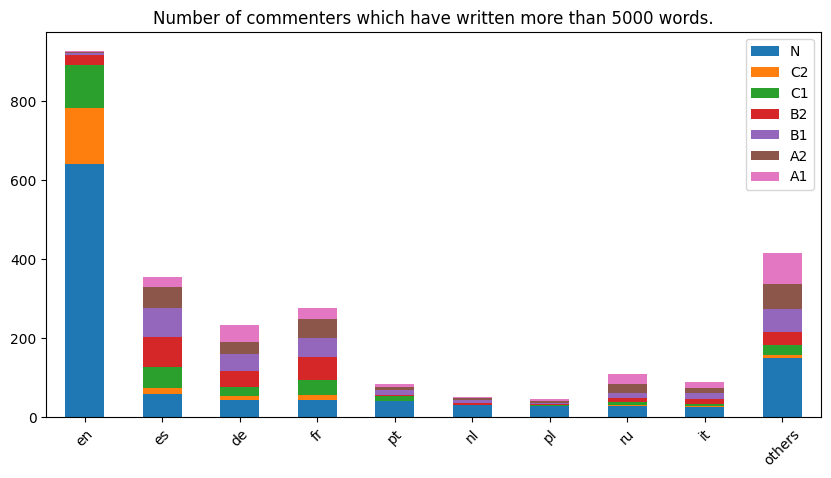

In [145]:
plt.figure()
hist.plot(stacked = True, kind = 'bar')
plt.xticks(ticks = np.arange(0, 9.1, 1),labels = hist.languages.to_list(), rotation = 45)
plt.title('Number of commenters which have written more than 5000 words.')
plt.savefig('Figures/lang_hist.eps', format='eps')
plt.show()


# Time range study

<AxesSubplot: >

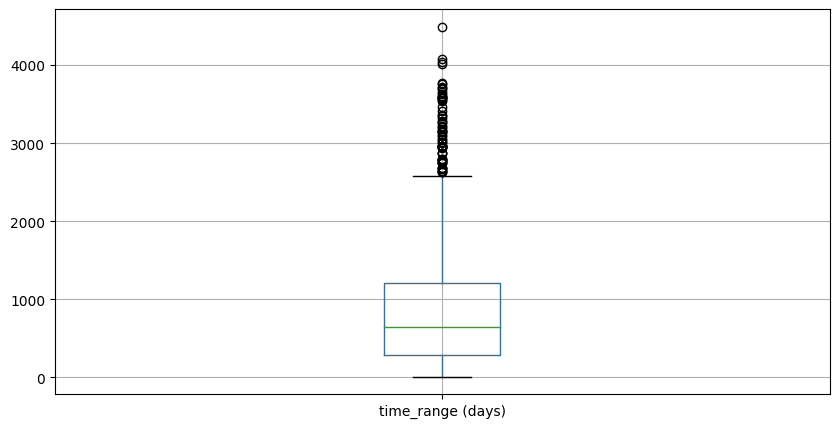

In [122]:
main_df_final[['time_range (days)']].boxplot()

# Sand Box

In [123]:
xticks = hist.countries.to_list()
xticks

['en', 'es', 'de', 'fr', 'pt', 'nl', 'pl', 'ru', 'it', 'others']

In [124]:
file, nb_words, oldest_comment = create_file('YouNinjaBro', 1, 500, True)
print(file[0])
print(nb_words)
print(oldest_comment)



NameError: name 'create_file' is not defined

In [147]:
author = 'YouNinjaBro'
df = pd.read_json(path_to_json + author + '.json')
comments = df['body']
timestamp = df['created_utc']

print(comments[3])

I find reading for me is the best way to learn new words, along with this I couple this with Anki and Memorise and watch pretty much everything with Spanish Subs on to learn new words which I don't understand. Its a grind yes but worth it in the long run.   


In terms on time 15 Mins per app review in the morning, 15 before I go to bed, I also try to read at least 30 mins to 1 hour per day in my target language, but that also depends if I am also reading a book in English for personal pleasure. So on average every day 1-2 hours on vocabulary.


In [191]:
comment = comments[0] + comments[1] + comments[2] + comments[3]
words = len(comment.split())
print(words)
comment = comment.split()
print(comment + comment)
#print(comment[:200])


272
['Dropped', 'prortugese,', 'Didn´t', 'have', 'anyone', 'in', 'which', 'is', 'practice', 'with.', 'This', 'was', 'my', 'first', 'attempt', 'at', 'learning', 'a', 'second', 'language', '(Now', 'C1', 'in', 'Spanish)', 'I', 'will', 'pick', 'it', 'up', 'again', 'hopefully', 'when', 'I', 'reach', 'the', 'level', 'in', 'Spanish', 'that', 'I', 'want.', 'Think', 'i', 'stopped', 'as', 'I', 'was', 'looking', 'for', 'a', 'language', 'that', 'I', 'wanted', 'to', 'learn', 'and', 'didn´t', 'have', 'the', 'motivation,', 'Now', 'after', 'nearly', '2', 'years', 'learning', 'Spanish', 'I', 'beleive', 'I', 'could', 'pick', 'it', 'back', 'up', 'eventually.', 'Saying', 'that', 'I', 'am', 'able', 'to', 'read', 'it', 'now', 'without', 'many', 'issues,', 'a', 'benefit', 'from', 'my', 'Spanish,Started', 'November', '2020,', 'Met', 'July', '2021', 'first', 'time', '(3)', 'days', ',', 'Second', 'time', 'Aug', '22', '(2', 'weeks),', '3rd', 'For', '2', 'Months', 'in', 'September', 'unti', 'November,', 'Then', '

In [95]:
str = 'Hello my name is True'


print(str.rsplit(' ', 3)[0])

Hello my


In [58]:
from datetime import datetime, date
test = pd.read_json(path_to_json + 'zazzerida.json')
print()
a = test['created_utc'].to_list()

start = datetime.utcfromtimestamp(a[0])
end = datetime.utcfromtimestamp(a[-1])

(start - end).days

477

# Clean Dataset


In [1]:
import pandas as pd

In [67]:
levels_df = pd.read_csv('Data/user_levels.csv')
print(len(levels_df))
levels_df.head()

2144


,Unnamed: 0,author,flair,N,A1,A2,B1,B2,C1,C2
0,0,jlba64,N:fr,['fr'],[],[],[],[],[],[]
1,1,alexsteb,German N | English C1 | Korean B1 | Mandarin B1,['de'],[],[],['ko'],[],['en'],[]
2,2,Noktilucent,"🇺🇸(N) | 🇲🇽 (B1), 🇩🇪 (A2), 🇮🇹 (A2)",['en'],[],"['de', 'it']",['es'],[],[],[]
3,3,makingthematrix,🇵🇱 native | 🇺🇸 fluent | 🇫🇷 learning | 🇩🇪 murmeln,['pl'],[],[],[],[],[],[]
4,4,jammal20,🇪🇬 N 🇺🇸 F 🇮🇱 B2 🇹🇷 A2 🇪🇸 A2 🇬🇷 Know the alphabet,['ar'],[],"['tr', 'es']",[],['he'],[],[]


In [68]:
level_columns = ['N', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']
bool = (levels_df['N'].str.contains('en|EN|En|eN')  | levels_df['N'].str.contains('fr|FR|Fr|fR') |
        levels_df['A1'].str.contains('en|EN|En|eN') | levels_df['A1'].str.contains('fr|FR|Fr|fR') |
        levels_df['A2'].str.contains('en|EN|En|eN') | levels_df['A2'].str.contains('fr|FR|Fr|fR') |
        levels_df['B1'].str.contains('en|EN|En|eN') | levels_df['B1'].str.contains('fr|FR|Fr|fR') |
        levels_df['B2'].str.contains('en|EN|En|eN') | levels_df['B2'].str.contains('fr|FR|Fr|fR') |
        levels_df['C1'].str.contains('en|EN|En|eN') | levels_df['C1'].str.contains('fr|FR|Fr|fR') |
        levels_df['C2'].str.contains('en|EN|En|eN') | levels_df['C2'].str.contains('fr|FR|Fr|fR') )

levels_df = levels_df[bool]

In [14]:
english_french_authors = levels_df['author'].to_list()
# path to my json files folder
path_to_json = 'Data/user_comments/'
frames = []

for author in english_french_authors:
    fpath = path_to_json + author + '.json'
    if is_non_zero_file(fpath):
        df = pd.read_json(fpath)
        if (df.iloc[0][0] != 'suspended') and (df.iloc[0][0] != 'deleted'):
            frames.append(df)
        
comments_df = pd.concat(frames)
comments_df.head(20)
print(len(comments_df))

764414


In [15]:
comments_df = comments_df[['author', 'body', 'created_utc']]
comments_df['number_of_words'] = comments_df['body'].str.split().str.len()
comments_df

,author,body,created_utc,number_of_words
0,alexsteb,Check out TalkToMeInKorean. They at least HAD ...,1666878614,16
1,alexsteb,"It's a toss up between Japanese, Korean and Ma...",1666874877,49
2,alexsteb,"I've seen something like those also in Göreme,...",1666793085,14
3,alexsteb,Wrong tones are like wrong vowels. It's still ...,1666767494,21
4,alexsteb,\*als du es dir vorgestellt hast.,1666767139,6
...,...,...,...,...
11,Mysterious_Ratio8813,Did you get 197?,1661104397,4
12,Mysterious_Ratio8813,Ameen,1660787673,1
13,Mysterious_Ratio8813,It’s 4 cause it releases at 6 BST/UTC+1 and ri...,1660783532,14
14,Mysterious_Ratio8813,You mean 4 hours 32 mins?,1660783175,6


In [16]:
# Drop all duplicates because some commenters are spamming the same thing -->  biases for ML
comments_df.drop_duplicates(subset = ['author', 'body'], keep = 'first', inplace = True)


In [17]:
comments_df_grouped = comments_df.groupby('author')
comments_df_grouped.head(10)


,author,body,created_utc,number_of_words
0,alexsteb,Check out TalkToMeInKorean. They at least HAD ...,1666878614,16
1,alexsteb,"It's a toss up between Japanese, Korean and Ma...",1666874877,49
2,alexsteb,"I've seen something like those also in Göreme,...",1666793085,14
3,alexsteb,Wrong tones are like wrong vowels. It's still ...,1666767494,21
4,alexsteb,\*als du es dir vorgestellt hast.,1666767139,6
...,...,...,...,...
5,Mysterious_Ratio8813,Could it imply that you aren’t fully committed...,1666008939,17
6,Mysterious_Ratio8813,Does it put you at any disadvantage compared t...,1666008805,12
7,Mysterious_Ratio8813,I was assuming they were so low as a result of...,1665430305,27
8,Mysterious_Ratio8813,Don’t you need 80% overall for a 7 approx?,1665429442,9


In [18]:
comments_df_sum = comments_df_grouped.number_of_words.agg('sum')
kept_authors = comments_df_sum[comments_df_sum >= 5000].index.tolist()


In [19]:
import numpy as np

In [20]:
comments_df = comments_df[comments_df['author'].isin(kept_authors)]
comments_df['body_lang'] = np.NaN

/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_42189/2799490758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['body_lang'] = np.NaN


In [21]:
comments_df

,author,body,created_utc,number_of_words,body_lang
0,alexsteb,Check out TalkToMeInKorean. They at least HAD ...,1666878614,16,NaN
1,alexsteb,"It's a toss up between Japanese, Korean and Ma...",1666874877,49,NaN
2,alexsteb,"I've seen something like those also in Göreme,...",1666793085,14,NaN
3,alexsteb,Wrong tones are like wrong vowels. It's still ...,1666767494,21,NaN
4,alexsteb,\*als du es dir vorgestellt hast.,1666767139,6,NaN
...,...,...,...,...,...
468,eternallyrainy,Você vai encontrar no site da MTV Austrália. S...,1580778448,23,NaN
469,eternallyrainy,Já fui parar em um PS por achar que estava pas...,1580777796,87,NaN
470,eternallyrainy,In my town there is an old guy named Stalin. ...,1579795980,33,NaN
471,eternallyrainy,It's so easy to make y'all angry. Not even fun...,1579105401,24,NaN


In [22]:
comments_df.reset_index(drop = True, inplace = True)
comments_df.to_pickle('Data/processed_comments')
comments_df

,author,body,created_utc,number_of_words,body_lang
0,alexsteb,Check out TalkToMeInKorean. They at least HAD ...,1666878614,16,NaN
1,alexsteb,"It's a toss up between Japanese, Korean and Ma...",1666874877,49,NaN
2,alexsteb,"I've seen something like those also in Göreme,...",1666793085,14,NaN
3,alexsteb,Wrong tones are like wrong vowels. It's still ...,1666767494,21,NaN
4,alexsteb,\*als du es dir vorgestellt hast.,1666767139,6,NaN
...,...,...,...,...,...
725187,eternallyrainy,Você vai encontrar no site da MTV Austrália. S...,1580778448,23,NaN
725188,eternallyrainy,Já fui parar em um PS por achar que estava pas...,1580777796,87,NaN
725189,eternallyrainy,In my town there is an old guy named Stalin. ...,1579795980,33,NaN
725190,eternallyrainy,It's so easy to make y'all angry. Not even fun...,1579105401,24,NaN


In [103]:
test = pd.read_pickle('Data/processed_comments')
test[test.duplicated(subset = ['author', 'body'],keep = 'first')]

,author,body,created_utc,number_of_words,body_lang


In [35]:
test[test.duplicated(subset = ['author', 'body'],keep = False)]
test.index

KeyError: Index(['body'], dtype='object')

In [34]:
comments_df[[author]]['body'].str.contains('https')

In [61]:
pd.concat(comments_df.body.loc[500:1000], 'body')

AttributeError: 'Series' object has no attribute 'concat'

In [74]:
level_columns = ['N', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']
for level in level_columns:   
    levels_df.loc[levels_df[level].str.contains('en|EN|En|eN'), 'english'] = level
    levels_df.loc[levels_df[level].str.contains('fr|FR|Fr|fR'), 'french'] = level


In [78]:
df = levels_df[['author', 'english', 'french']]
df.to_pickle('Data/users_levels_clean')

In [1]:
from features_and_svm_functions import *

## Analyse outputs from grid search

In [24]:
# Import outputs and inputs

df_inputs = pd.read_pickle('features/grid_search_results/inputs_df')
df_all = pd.read_pickle('features/grid_search_results/output_all.pkl')
df_native = pd.read_pickle('features/grid_search_results/output_native.pkl')
df_non_native = pd.read_pickle('features/grid_search_results/output_non_native.pkl')

In [25]:
# Converts all the columns into float format to use idxmax and max functions
for column in df_all.columns:
    df_all[column] = pd.to_numeric(df_all[column])
for column in df_native.columns:
    df_native[column] = pd.to_numeric(df_native[column])
for column in df_non_native.columns:
    df_non_native[column] = pd.to_numeric(df_non_native[column])


In [29]:
from IPython.display import display
def find_max(df, col):
    max_ =  df[col].max()
    df_max = df[df[col] == df[col].max()]
    print('The maximum value of', col , 'reach during the grid search is', df[col].max(), '!')
    print('With other scores equal to') 
    display(pd.DataFrame(df_max))
    #print('Using the following parameters:')
    #display(pd.DataFrame(df_inputs.loc[df_max.index]))
    winning_set = pd.DataFrame(df_inputs.loc[df_max.index])
    mode = winning_set.mode().head(1)
    print('Here are the modal parameters:')
    display(mode)
    for var in ["n_POS_tag_1gram", "n_letter_2gram", "n_digit_1gram", "n_letter_1gram", "n_letter_3gram", "n_letter_4gram", "n_word_1gram", "n_punctuation_1gram", "n_punctuation_2gram", "n_word_2gram", "n_POS_tag_2gram"]:
        winning_set["match_" + var] = np.where(winning_set[var] == mode[var][0], 1, 0)
    winning_set['num_param_matched'] = winning_set.iloc[:, 14:100].sum(axis = 1)
    param_matched_max = winning_set['num_param_matched'].max()
    winning_set = winning_set[winning_set["num_param_matched"] == param_matched_max]
    winning_set = winning_set.iloc[:, 1:14]
    winning_set.drop('penalty', inplace=True, axis = 1)
    winning_set.drop('seed', inplace=True, axis = 1)
    print("Here is the model which shares as many of the parameters as possible")
    display(winning_set)

In [30]:
# find the maximum values for a certain criteria in a certain output df and print the scores and the inputs
find_max(df_non_native, 'f1')
find_max(df_native, 'f1')
find_max(df_all, 'f1_overall')

The maximum value of f1 reach during the grid search is 86.56 !
With other scores equal to


,accuracy,f1
20393,86.67,86.56
24281,86.67,86.56
30596,86.67,86.56
30599,86.67,86.56


Here are the modal parameters:


,C_svm,n_POS_tag_1gram,n_letter_2gram,n_digit_1gram,n_letter_1gram,n_letter_3gram,n_letter_4gram,n_word_1gram,penalty,n_punctuation_1gram,n_punctuation_2gram,seed,n_word_2gram,n_POS_tag_2gram
0,3.0,24.0,20.0,10.0,13,200.0,500.0,500.0,2.0,18.0,20.0,22.0,100,100.0


Here is the model which shares as many of the parameters as possible


,n_POS_tag_1gram,n_letter_2gram,n_digit_1gram,n_letter_1gram,n_letter_3gram,n_letter_4gram,n_word_1gram,n_punctuation_1gram,n_punctuation_2gram,n_word_2gram,n_POS_tag_2gram
30596,24,20,10,26,200,500,500,18,20,100,20
30599,24,20,10,26,200,500,500,18,20,100,500


The maximum value of f1 reach during the grid search is 91.33 !
With other scores equal to


,accuracy,f1
30599,91.67,91.33
98259,91.67,91.33
122835,91.67,91.33
131026,91.67,91.33
131027,91.67,91.33
196562,91.67,91.33
196563,91.67,91.33
221138,91.67,91.33
221139,91.67,91.33
229203,91.67,91.33


Here are the modal parameters:


,C_svm,n_POS_tag_1gram,n_letter_2gram,n_digit_1gram,n_letter_1gram,n_letter_3gram,n_letter_4gram,n_word_1gram,penalty,n_punctuation_1gram,n_punctuation_2gram,seed,n_word_2gram,n_POS_tag_2gram
0,3,48,500,10,26,500,500,500,2,36,100,22,20,500


Here is the model which shares as many of the parameters as possible


,n_POS_tag_1gram,n_letter_2gram,n_digit_1gram,n_letter_1gram,n_letter_3gram,n_letter_4gram,n_word_1gram,n_punctuation_1gram,n_punctuation_2gram,n_word_2gram,n_POS_tag_2gram
262099,48,500,10,26,500,500,500,36,100,20,500


The maximum value of f1_overall reach during the grid search is 91.33 !
With other scores equal to


,acc_native,acc_non_native,acc_overall,f1_native,f1_non_native,f1_overall
53218,100.0,83.33,91.67,100.0,84.0,91.33
53219,100.0,83.33,91.67,100.0,84.0,91.33
53234,100.0,83.33,91.67,100.0,84.0,91.33
53235,100.0,83.33,91.67,100.0,84.0,91.33
55138,100.0,83.33,91.67,100.0,84.0,91.33
...,...,...,...,...,...,...
262137,100.0,83.33,91.67,100.0,84.0,91.33
262138,100.0,83.33,91.67,100.0,84.0,91.33
262139,100.0,83.33,91.67,100.0,84.0,91.33
262141,100.0,83.33,91.67,100.0,84.0,91.33


Here are the modal parameters:


,C_svm,n_POS_tag_1gram,n_letter_2gram,n_digit_1gram,n_letter_1gram,n_letter_3gram,n_letter_4gram,n_word_1gram,penalty,n_punctuation_1gram,n_punctuation_2gram,seed,n_word_2gram,n_POS_tag_2gram
0,3,48,500,10,26,500,500,500,2,36,500,22,20,200


Here is the model which shares as many of the parameters as possible


,n_POS_tag_1gram,n_letter_2gram,n_digit_1gram,n_letter_1gram,n_letter_3gram,n_letter_4gram,n_word_1gram,n_punctuation_1gram,n_punctuation_2gram,n_word_2gram,n_POS_tag_2gram
262130,48,500,10,26,500,500,500,36,500,20,200


In [31]:
from IPython.display import display, HTML
css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

new_df = pd.DataFrame(df_inputs.loc[262130]).rename(columns = {262130: 'All'})
new_df['Native'] = pd.Series(df_inputs.loc[262099])
new_df['Learners'] = pd.DataFrame(df_inputs.loc[30596])

new_df

,All,Native,Learners
C_svm,3,3,3
n_POS_tag_1gram,48,48,24
n_letter_2gram,500,500,20
n_digit_1gram,10,10,10
n_letter_1gram,26,26,26
n_letter_3gram,500,500,200
n_letter_4gram,500,500,500
n_word_1gram,500,500,500
penalty,2,2,2
n_punctuation_1gram,36,36,18


In [41]:
pd.concat((new_df, pd.DataFrame({'All': 262131, 'Native': 262100, 'Learners': 20391}, index = ['input_file'])))

,All,Native,Learners
C_svm,3.0,3.0,3.0
n_POS_tag_1gram,48.0,48.0,24.0
n_letter_2gram,500.0,500.0,20.0
n_digit_1gram,10.0,10.0,10.0
n_letter_1gram,26.0,26.0,13.0
n_letter_3gram,500.0,500.0,100.0
n_letter_4gram,500.0,500.0,500.0
n_word_1gram,500.0,500.0,500.0
penalty,2.0,2.0,2.0
n_punctuation_1gram,36.0,36.0,18.0
